In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('/content/desafio1.csv')

In [3]:
df.head()

,RowNumber,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RowNumber                 7000 non-null   int64  
 1   id                        7000 non-null   object 
 2   sobrenome                 7000 non-null   object 
 3   pontuacao_credito         7000 non-null   int64  
 4   estado_residencia         7000 non-null   object 
 5   genero                    7000 non-null   object 
 6   idade                     7000 non-null   int64  
 7   nivel_estabilidade        7000 non-null   int64  
 8   saldo_conta               7000 non-null   float64
 9   numero_produtos           7000 non-null   int64  
 10  possui_cartao_de_credito  7000 non-null   int64  
 11  membro_ativo              7000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 656.4+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,7000.0,3500.500000,2020.870275,1.0,1750.75,3500.50,5250.250,7000.00
pontuacao_credito,7000.0,649.787000,97.046279,350.0,582.00,651.00,717.000,850.00
idade,7000.0,38.892714,10.465562,18.0,32.00,37.00,44.000,92.00
nivel_estabilidade,7000.0,5.010286,2.887500,0.0,3.00,5.00,7.250,10.00
saldo_conta,7000.0,76471.883751,62403.383911,0.0,0.00,97277.13,127537.155,250898.09
numero_produtos,7000.0,1.526000,0.583047,1.0,1.00,1.00,2.000,4.00
possui_cartao_de_credito,7000.0,0.703286,0.456842,0.0,0.00,1.00,1.000,1.00
membro_ativo,7000.0,0.512143,0.499888,0.0,0.00,1.00,1.000,1.00


1. A idade reflete na pontuação de crédito do cliente
2. Idade reflete no nível de estabilidade do cliente
3. Quanto maior a pontuação maior o saldo em conta
4. Possuir cartão de crédito infere no nível de estabilidade


1. A idade reflete na pontuação de cŕedito do cliente

In [0]:
def process_age(df, cut_points,labels):
  df['Categorias_Idades'] = pd.cut(df['idade'], cut_points, labels = labels)
  return df 

cut_points = [18,25,35,40,60,100]
labels = ['Jovem Adulto', 'Adultez Plena', 'Adultez final', 'Meia Idade', 'Idoso']

df = process_age(df,cut_points,labels)



In [7]:
df[df['Categorias_Idades'] == 'Jovem Adulto']['pontuacao_credito'].mean()

652.4530516431925

In [8]:
df[df['Categorias_Idades'] == 'Adultez Plena']['pontuacao_credito'].mean()

648.2604124545087

In [9]:
df[df['Categorias_Idades'] == 'Adultez final']['pontuacao_credito'].mean()

652.4694533762058

In [10]:
df[df['Categorias_Idades'] == 'Meia Idade']['pontuacao_credito'].mean()

648.6132671480144

In [11]:
df[df['Categorias_Idades'] == 'Idoso']['pontuacao_credito'].mean()

650.8301886792453

In [12]:
pivot_table = df.pivot_table(index = 'Categorias_Idades', values = 'pontuacao_credito', aggfunc= np.mean)
pivot_table


,pontuacao_credito
Categorias_Idades,
Jovem Adulto,652.453052
Adultez Plena,648.260412
Adultez final,652.469453
Meia Idade,648.613267
Idoso,650.830189


Logo percebemos que em média, pessoas que se concentram entre 35-40 anos são pessoas que possuem tendência de terem melhores pontuações.

2.Idade reflete no nível de estabilidade do cliente

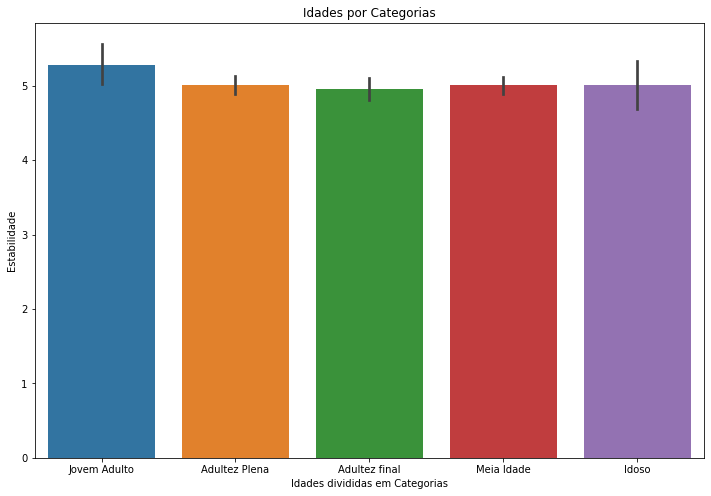

In [13]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'Categorias_Idades', y = 'nivel_estabilidade', data = df)
plt.xlabel('Idades divididas em Categorias')
plt.ylabel('Estabilidade')
plt.title('Idades por Categorias')
plt.show()

Percebemos que a categoria que apresenta maior estabilidade são os Jovens adultos, isso pode ser reflexo de ser uma categoria que esta entrando no mercado de trabalho agora e que estão começando a realizar seus primeiros gastos.

3. Quanto maior a pontuação maior o saldo em conta


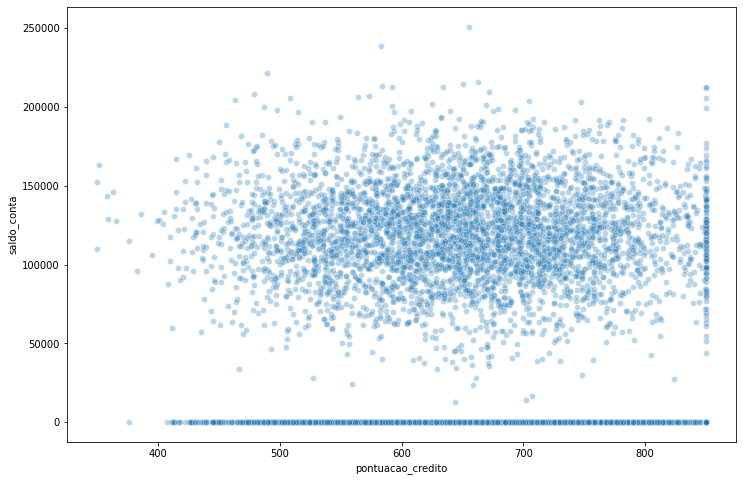

In [14]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'pontuacao_credito', y = 'saldo_conta', data = df, alpha = 0.3)
plt.show()

Podemos perceber que não possui nenhuma correlação entre pontuação de credito quanto em relação ao saldo em conta.

4. Possuir cartão de crédito infere no nível de estabilidade

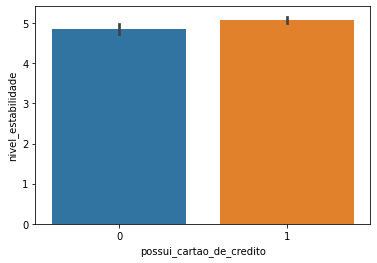

In [15]:
sns.barplot(x = 'possui_cartao_de_credito', y= 'nivel_estabilidade', data = df)

é perceptivel notar que, usuários que possuiem cartão de crédito possuem maiores níveis de creditibilidade do que usuários que não tem.


Agora, vamos analise para a soluções!

#Solução usando o Stats.mode

In [0]:
pontuacao_estados = df.groupby('estado_residencia').agg({'pontuacao_credito': [stats.mode,np.median, np.mean, np.std]})

In [0]:
pontuacao_estados.columns = [
  'moda', 'mediana', 'media', 'desvio_padrao'
]

In [18]:
pontuacao_estados

,moda,mediana,media,desvio_padrao
estado_residencia,,,,
PR,"([850], [47])",650,648.961294,98.607186
RS,"([850], [42])",650,651.105143,95.136598
SC,"([850], [78])",653,649.537653,97.233493


In [0]:
def extrai_moda(val):
  result = val.mode.tolist()[0]
  return result

pontuacao_estados['moda'] = pontuacao_estados['moda'].apply(extrai_moda)

In [20]:
result = pontuacao_estados 
result

,moda,mediana,media,desvio_padrao
estado_residencia,,,,
PR,850,650,648.961294,98.607186
RS,850,650,651.105143,95.136598
SC,850,653,649.537653,97.233493


In [0]:
result.to_json('submission.json',orient = 'index')

In [22]:
pd.read_json('/content/submission.json')

,PR,RS,SC
moda,850.000000,850.000000,850.000000
mediana,650.000000,650.000000,653.000000
media,648.961294,651.105143,649.537653
desvio_padrao,98.607186,95.136598,97.233493


# Solução usando Pd.Series.mode

In [23]:
pontuacao_estados = df.groupby('estado_residencia').agg({'pontuacao_credito': [pd.Series.mode,np.median, np.mean, np.std]})
pontuacao_estados.columns = [
  'moda', 'mediana', 'media', 'desvio_padrao'
]
pontuacao_estados

,moda,mediana,media,desvio_padrao
estado_residencia,,,,
PR,850,650,648.961294,98.607186
RS,850,650,651.105143,95.136598
SC,850,653,649.537653,97.233493


In [0]:
result = pontuacao_estados
result.to_json('submission.json',orient = 'index')

In [28]:
pd.read_json('/content/submission.json')

,moda,mediana,media,desvio_padrao
PR,850,650,648.961294,98.607186
RS,850,650,651.105143,95.136598
SC,850,653,649.537653,97.233493
